# Depandancies

In [ ]:
!pip install pytrends
!pip install statsmodels==0.12.1
!pip install pmdarima

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=0007af85964566ff2f03c91583af9e35fc251a9e63bdd3ce5f476ac1af43f3e5
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
     |████████████████████████████████| 9.5 MB 5.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 8.4 MB/s 


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2022-05-14 00:52:15--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-14 00:52:15--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-14 00:52:15--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import datetime, date, time, timedelta
import requests
import os
import glob
import nest_asyncio
import json
import asyncio
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import datetime
import pandas as pd
import pytz 
import datetime  
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from pytrends.request import TrendReq
from pytrends import dailydata
import pytrends
import talib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
pd.options.mode.chained_assignment = None
import datetime as dt

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import requests
import os
import glob
import nest_asyncio
nest_asyncio.apply()
import json

# ARIMAX

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/BTC_OHLCV.csv")
dff = dff.reset_index(drop = True)
dff

,timestamp,o,h,l,c,v
0,2018-12-31 19:00:00,3834.70,3834.700000,3690.90,3691.61,35.478807
1,2018-12-31 19:01:00,3833.80,3834.100000,3686.62,3690.65,20.875687
2,2018-12-31 19:02:00,3686.63,3832.000000,3686.62,3687.49,24.673518
3,2018-12-31 19:03:00,3831.70,3831.700000,3686.71,3716.75,15.993827
4,2018-12-31 19:04:00,3687.00,3831.800000,3686.63,3688.20,21.027198
...,...,...,...,...,...,...
1722164,2022-04-11 18:45:00,39939.51,39968.000000,39924.11,39930.40,8.142110
1722165,2022-04-11 18:46:00,39930.56,39960.000000,39785.00,39845.12,48.783320
1722166,2022-04-11 18:47:00,39845.11,39863.000000,39780.00,39816.20,29.457618
1722167,2022-04-11 18:48:00,39816.19,39839.000000,39700.88,39750.23,30.101822


In [ ]:
df.to_csv("Complete_historical_2018_2022", index = False)

In [ ]:
# dff['timestamp'] = pd.to_datetime(dff['timestamp'])
# dff = dff[dff["timestamp"] >= "2021-01-01"]
# dff

In [ ]:
dff['timestamp'] = pd.to_datetime(dff['timestamp'])
dff_ = dff.set_index("timestamp")
dff_ = dff_.resample('60Min').agg({'o': 'first', 'h': 'max', 'l': 'min', 'c': 'last','v':'sum'})
dff_

,o,h,l,c,v
timestamp,,,,,
2018-12-31 19:00:00,3834.700000,3846.200000,3680.63,3835.163503,2316.422612
2018-12-31 20:00:00,3835.048699,3840.100000,3666.40,3714.810000,3232.267076
2018-12-31 21:00:00,3827.600000,3834.200000,3665.00,3817.400000,2624.271531
2018-12-31 22:00:00,3817.300000,3832.300000,3673.99,3681.990000,2061.821383
2018-12-31 23:00:00,3681.100000,3844.900000,3674.50,3679.730000,3543.832002
...,...,...,...,...,...
2022-04-11 14:00:00,40471.800000,40547.000000,40220.70,40505.070000,1483.193515
2022-04-11 15:00:00,40505.070000,40630.000000,39761.03,39936.200000,3461.605297
2022-04-11 16:00:00,39981.120000,40281.000000,39492.65,39833.990000,3008.847110


In [ ]:
df = dff_.copy()
df = df.reset_index()
df = df.rename({"o" : "open", "h" : "high", "l" : "low", "c" : "close", "v" : "volume"}, axis = 1)


df = df.dropna()
df["EMA2"] = talib.EMA(df["close"], timeperiod=2)
df["SMA2"] = talib.SMA(df["close"], timeperiod=2)

df["RSI2"] = talib.RSI(df["close"], timeperiod=14)
df["SMA2/EMA2"] = talib.SMA(df["close"], timeperiod=14)/talib.EMA(df["close"], timeperiod=14)
df["EMA2/SMA2"] = talib.EMA(df["close"], timeperiod=14)/talib.SMA(df["close"], timeperiod=14)
df["ATR"] = talib.ATR(df["high"], df["low"], df["close"], timeperiod=14)


# df["prev_close"] = df["close"].shift(+1)
# df["prev2_close"] = df["close"].shift(+2)
# df["prev3_close"] = df["close"].shift(+3)
# df["prev4_close"] = df["close"].shift(+4)
# df["prev5_close"] = df["close"].shift(+5)

#df["close"] = df["close"].shift(-1)
df["close"] = df["close"].shift(-1).pct_change()
df["prev_close"] = df["close"].shift(+1)
df["prev2_close"] = df["close"].shift(+2)
df["prev3_close"] = df["close"].shift(+3)
df["prev4_close"] = df["close"].shift(+4)
df["prev5_close"] = df["close"].shift(+5)


df = df.dropna()
df = df[["timestamp", "open", "high", "low","volume", "prev_close", "prev2_close", "prev3_close", "prev4_close", "prev5_close", "SMA2/EMA2", "EMA2/SMA2", "RSI2", "ATR", "close"]]
df = df.set_index("timestamp")
df

,open,high,low,volume,prev_close,prev2_close,prev3_close,prev4_close,prev5_close,SMA2/EMA2,EMA2/SMA2,RSI2,ATR,close
timestamp,,,,,,,,,,,,,,
2019-01-01 09:00:00,3866.20,3866.200000,3670.72,1794.734878,-0.044026,0.040485,-0.003179,0.005861,-0.035952,0.998975,1.001026,43.154704,171.080714,-0.004551
2019-01-01 10:00:00,3841.00,3842.700000,3668.26,1521.528310,-0.004551,-0.044026,0.040485,-0.003179,0.005861,1.000312,0.999688,42.399738,171.320663,0.004199
2019-01-01 11:00:00,3825.60,3842.000000,3674.35,780.603879,0.004199,-0.004551,-0.044026,0.040485,-0.003179,0.999158,1.000843,43.379588,171.058473,-0.001207
2019-01-01 12:00:00,3694.52,3843.400000,3675.64,1665.731862,-0.001207,0.004199,-0.004551,-0.044026,0.040485,1.000516,0.999485,43.151385,170.822868,-0.006978
2019-01-01 13:00:00,3685.88,3828.500000,3629.66,3054.081476,-0.006978,-0.001207,0.004199,-0.004551,-0.044026,1.002190,0.997815,41.784665,172.824092,0.049147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11 14:00:00,40471.80,40547.000000,40220.70,1483.193515,0.001123,-0.007364,0.004423,-0.005360,-0.008159,1.003592,0.996421,27.310385,424.743316,-0.014044
2022-04-11 15:00:00,40505.07,40630.000000,39761.03,3461.605297,-0.014044,0.001123,-0.007364,0.004423,-0.005360,1.003540,0.996472,22.228291,456.473794,-0.002559
2022-04-11 16:00:00,39981.12,40281.000000,39492.65,3008.847110,-0.002559,-0.014044,0.001123,-0.007364,0.004423,1.003153,0.996857,21.455747,480.179237,-0.010918


In [ ]:
#exg_features = ['open', 'high', 'low', 'volume', 'prev_close', 'prev2_close','prev3_close', 'prev4_close', 'prev5_close', 'SMA2/EMA2', "EMA2/SMA2", "RSI2", "ATR"]
exg_features = ['prev_close', 'prev2_close','prev3_close', 'prev4_close', 'prev5_close', "RSI2", "ATR"]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.01, shuffle = False)

In [ ]:
model = pm.auto_arima(df_train.close, exogenous=df_train[exg_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.close, exogenous=df_train[exg_features])

Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-184215.367, Time=35.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-184223.380, Time=19.84 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-184221.380, Time=21.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-184221.380, Time=24.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-182124.220, Time=86.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-184219.300, Time=27.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 214.965 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
forecast = model.predict(n_periods=len(df_test), exogenous=df_test[exg_features])
df_test["Forecast_ARIMAX"] = forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


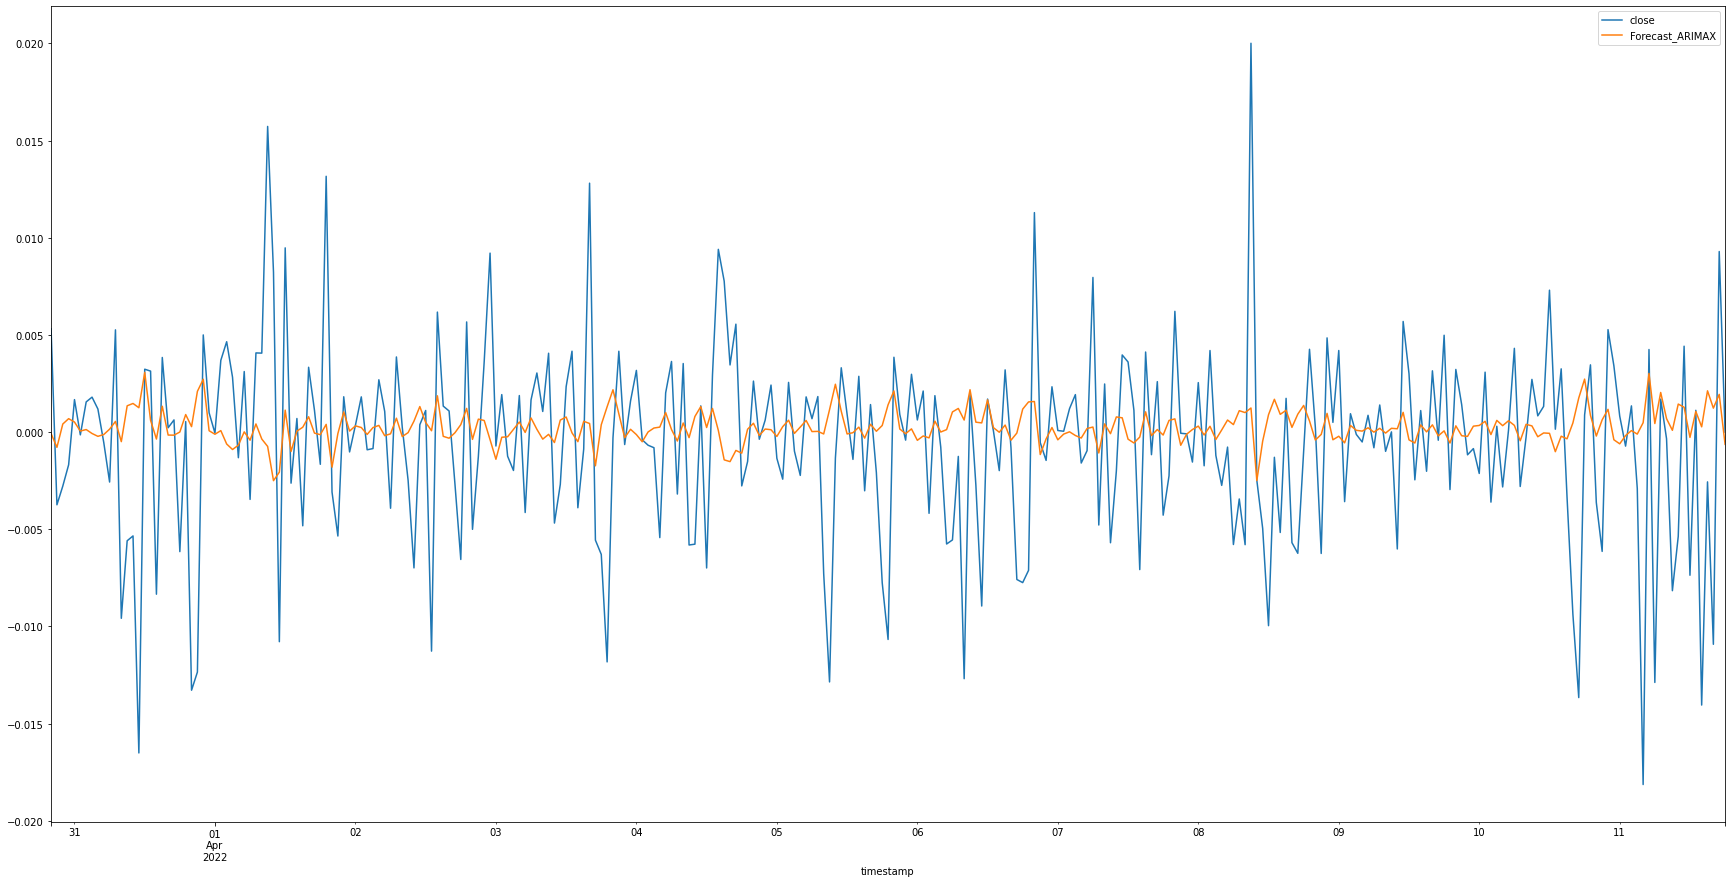

In [ ]:
df_test[["close", "Forecast_ARIMAX"]].plot(figsize=(30, 15))

In [ ]:
df_test

,open,high,low,volume,prev_close,prev2_close,prev3_close,prev4_close,prev5_close,SMA2/EMA2,EMA2/SMA2,RSI2,ATR,close,Forecast_ARIMAX
timestamp,,,,,,,,,,,,,,,
2022-03-30 20:00:00,47048.947769,47286.880000,46965.256484,485.126824,0.001926,-0.000705,0.002132,-0.005716,0.004250,1.000014,0.999986,47.875102,358.144640,0.005318,-0.000073
2022-03-30 21:00:00,47168.670000,47439.330000,47143.610045,459.552578,0.005318,0.001926,-0.000705,0.002132,-0.005716,0.999514,1.000487,53.490143,353.685734,-0.003739,-0.000781
2022-03-30 22:00:00,47395.000000,47431.570000,47174.146137,324.104416,-0.003739,0.005318,0.001926,-0.000705,0.002132,0.999366,1.000634,49.436953,346.809886,-0.002779,0.000417
2022-03-30 23:00:00,47240.750000,47276.720000,47057.380785,305.112917,-0.002779,-0.003739,0.005318,0.001926,-0.000705,0.999863,1.000137,46.620112,337.704838,-0.001680,0.000694
2022-03-31 00:00:00,47110.990000,47163.830000,46994.000000,362.261899,-0.001680,-0.002779,-0.003739,0.005318,0.001926,1.000217,0.999783,44.957196,325.713778,0.001674,0.000520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11 14:00:00,40471.800000,40547.000000,40220.700000,1483.193515,0.001123,-0.007364,0.004423,-0.005360,-0.008159,1.003592,0.996421,27.310385,424.743316,-0.014044,0.000273
2022-04-11 15:00:00,40505.070000,40630.000000,39761.030000,3461.605297,-0.014044,0.001123,-0.007364,0.004423,-0.005360,1.003540,0.996472,22.228291,456.473794,-0.002559,0.002127
2022-04-11 16:00:00,39981.120000,40281.000000,39492.650000,3008.847110,-0.002559,-0.014044,0.001123,-0.007364,0.004423,1.003153,0.996857,21.455747,480.179237,-0.010918,0.001235


In [ ]:
metrics_df = df_test[["close", "Forecast_ARIMAX"]]
metrics_df

,close,Forecast_ARIMAX
timestamp,,
2022-03-30 20:00:00,0.005318,-0.000073
2022-03-30 21:00:00,-0.003739,-0.000781
2022-03-30 22:00:00,-0.002779,0.000417
2022-03-30 23:00:00,-0.001680,0.000694
2022-03-31 00:00:00,0.001674,0.000520
...,...,...
2022-04-11 14:00:00,-0.014044,0.000273
2022-04-11 15:00:00,-0.002559,0.002127
2022-04-11 16:00:00,-0.010918,0.001235


In [ ]:
metrics_df['Actual_target'] = metrics_df[['close']].apply(lambda x: 1 if x.close > 0 else 0, axis=1)

metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX']].apply(lambda x: 1 if x.Forecast_ARIMAX > 0 else 0, axis=1)

#metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX']].apply(lambda x: 1 if x.Forecast_ARIMAX > -99 else 0, axis=1)

#metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX','close']].apply(lambda x: 1 if x.Forecast_ARIMAX > 0 and x.Forecast_ARIMAX <= x.close else 0, axis=1)

In [ ]:
actual_targets = list(metrics_df["Actual_target"])
predicted_targets = list(metrics_df["Pred_target"])



long_ = 0
total_long = 0
short = 0
total_short = 0
long_wrong = 0
short_wrong = 0

for i in range(len(actual_targets)):
    if actual_targets[i] == 1: 
      if actual_targets[i] == predicted_targets[i]:
        long_ += 1
      if predicted_targets[i] == 0:
        short_wrong += 1
      total_long += 1
    else:
      if actual_targets[i] == predicted_targets[i]:
        short += 1
      if predicted_targets[i] == 1:
        long_wrong += 1
      total_short += 1

print(f"total correct long predictions are {long_} out of {total_long} and total correct short predictions are {short} out of {total_short}, so the accuracy is {(long_ + short)/ (total_long + total_short) * 100} %")
print(f"Long wrong are {long_wrong} and short wrong are {short_wrong}")

total correct long predictions are 95 out of 139 and total correct short predictions are 68 out of 148, so the accuracy is 56.79442508710801 %
Long wrong are 80 and short wrong are 44


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#target_names = ['class 1', 'class 0']
print(classification_report(actual_targets, predicted_targets))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52       148
           1       0.54      0.68      0.61       139

    accuracy                           0.57       287
   macro avg       0.57      0.57      0.56       287
weighted avg       0.58      0.57      0.56       287



# OHLCV-Polygon

In [ ]:
def daterange(date1, date2):
    for n in range(int((date2 - date1).days) + 1):
        yield date1 + timedelta(n)

In [ ]:
!pip install aiohttp

In [ ]:
import asyncio
import aiohttp  
import datetime 

data_dict = {}

async def get(
    session: aiohttp.ClientSession,
    date: str,
    **kwargs
) -> dict:
    global data_dict
    api = f"https://api.polygon.io/v2/aggs/ticker/MSTR/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=1440&apiKey=Ot5XxPIdM4IAsPj6TdlIqHajQFK356JB"
    #print(f"Requesting {api}")
    resp = await session.request('GET', url=api, **kwargs)
    #print(resp)
    data = await resp.json()
    # print(data)
    data_dict[date] = data
    
async def main(dates, **kwargs):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for c in dates:
            tasks.append(get(session=session, date=c, **kwargs))
        responses = await asyncio.gather(*tasks, return_exceptions=True)
        return responses


if __name__ == '__main__':
    start_date = '2020-01-01'
    end_date = '2022-05-07'
    dates = []
    for i in daterange(pd.to_datetime(start_date), pd.to_datetime(end_date)):
        dates.append(i.date().strftime("%Y-%m-%d"))
    #print(dates)
    asyncio.run(main(dates))  


In [ ]:
new_dict = []

for index,i in enumerate(data_dict):
    if 'results' not in list(data_dict[i].keys()):
        pass
    else:
        new_dict = new_dict + data_dict[i]['results']

In [ ]:
df = pd.DataFrame(new_dict)
df['timestamp'] = df['t']
del df['t']
df['timestamp'] = pd.to_datetime(df['timestamp'],unit = 'ms')
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC')
df['timestamp'] = df['timestamp'].dt.tz_convert('US/Eastern')
df['timestamp'] = df['timestamp'].dt.tz_localize(None)
df = df[['timestamp','o','h','l','c','v']]
df = df.sort_values(by = 'timestamp')
df = df.set_index("timestamp")
df = df.resample('H').mean()
df

,o,h,l,c,v
timestamp,,,,,
2020-01-02 09:00:00,143.782500,143.782500,143.782500,143.782500,246.750000
2020-01-02 10:00:00,143.586636,143.600273,143.535727,143.535727,304.181818
2020-01-02 11:00:00,143.112000,143.135000,143.112000,143.135000,247.600000
2020-01-02 12:00:00,142.837500,142.837500,142.837500,142.837500,255.250000
2020-01-02 13:00:00,143.130714,143.136429,143.130714,143.136429,256.571429
...,...,...,...,...,...
2022-05-06 12:00:00,293.604056,294.003349,293.305233,293.689405,1533.368421
2022-05-06 13:00:00,296.474429,296.720051,296.180882,296.443595,1816.109091
2022-05-06 14:00:00,293.169309,293.416245,292.866077,293.147483,2010.754717


In [ ]:
df.to_csv("MSTR_2020-2022_Min.csv")
!cp MSTR_2020-2022_Min.csv /content/drive/MyDrive

In [ ]:
df_mstr = pd.read_csv("/content/drive/MyDrive/MSTR_2020-2022_Min.csv")
df_mstr

,timestamp,o,h,l,c,v
0,2020-01-02 09:00:00,143.782500,143.782500,143.782500,143.782500,246.750000
1,2020-01-02 10:00:00,143.586636,143.600273,143.535727,143.535727,304.181818
2,2020-01-02 11:00:00,143.112000,143.135000,143.112000,143.135000,247.600000
3,2020-01-02 12:00:00,142.837500,142.837500,142.837500,142.837500,255.250000
4,2020-01-02 13:00:00,143.130714,143.136429,143.130714,143.136429,256.571429
...,...,...,...,...,...,...
20523,2022-05-06 12:00:00,293.604056,294.003349,293.305233,293.689405,1533.368421
20524,2022-05-06 13:00:00,296.474429,296.720051,296.180882,296.443595,1816.109091
20525,2022-05-06 14:00:00,293.169309,293.416245,292.866077,293.147483,2010.754717
20526,2022-05-06 15:00:00,292.819618,293.207032,292.521537,292.890983,4191.600000


# ARIMAX WITH TWEETS

In [ ]:
# !cp /content/Gemini_BTCUSD_1h.csv /content/drive/MyDrive
# !cp /content/COMPLETE-FINAL-VADER-2014-2022.csv /content/drive/MyDrive

In [ ]:
        # self.duration = len(self) - self.bar_executed + 1
        # if self.duration == 1 and self.position.size > 0:
        #   self.order = self.close(price = self.dataclose[0], size = self.p.size)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Gemini_BTCUSD_1h.csv")
df = df.stack().reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = df[["date", "open", "high", "low", "Volume BTC", "close"]]
df = df.rename({"Volume BTC" : "volume", "date" : "timestamp"}, axis = 1)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")
df = df.reset_index(drop = True)
df

,timestamp,open,high,low,volume,close
0,2015-10-08 13:00:00,0.0,245.0,0.0,0.60665438,245.0
1,2015-10-08 14:00:00,245.0,245.0,244.5,4.453648931,245.0
2,2015-10-08 15:00:00,245.0,245.0,244.92,3.016925828,244.92
3,2015-10-08 16:00:00,244.92,244.92,244.25,3.89525246,244.25
4,2015-10-08 17:00:00,244.25,244.99,244.02,3.920632003,244.99
...,...,...,...,...,...,...
57652,2022-05-06 20:00:00,35996.68,36100.0,35865.0,31.55234367,36083.75
57653,2022-05-06 21:00:00,36083.75,36100.0,35882.81,36.33917961,35961.32
57654,2022-05-06 22:00:00,35961.32,36055.6,35884.76,30.0996847,35990.88
57655,2022-05-06 23:00:00,35990.88,36135.0,35978.91,79.57487521,36005.22


In [ ]:
# df.to_csv("/content/Backtrader_OHLCV", index = False)
# !cp /content/Backtrader_OHLCV /content/drive/MyDrive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/btc_latest_data.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df

,timestamp,open,high,low,volume,close
0,2015-10-08 13:00:00,0.000000,245.000000,0.000000,0.606654,245.000000
1,2015-10-08 14:00:00,245.000000,245.000000,244.500000,4.453649,245.000000
2,2015-10-08 15:00:00,245.000000,245.000000,244.920000,3.016926,244.920000
3,2015-10-08 16:00:00,244.920000,244.920000,244.250000,3.895252,244.250000
4,2015-10-08 17:00:00,244.250000,244.990000,244.020000,3.920632,244.990000
...,...,...,...,...,...,...
57820,2022-05-13 19:00:00,30021.777667,30117.873566,29987.820833,27.643384,30028.296537
57821,2022-05-13 20:00:00,29929.955480,30005.285968,29894.149500,32.276690,29922.025833
57822,2022-05-13 21:00:00,29876.871587,29956.233238,29857.959000,19.595915,29883.118870
57823,2022-05-13 22:00:00,29909.401167,29980.443894,29884.236167,18.458942,29910.547259


In [ ]:
#df2 = pd.read_csv("/content/drive/MyDrive/COMPLETE-FINAL-VADER-2014-2022.csv")

df2 = pd.read_csv("/content/FINAL_VADER.csv")
df2["timestamp"] = pd.to_datetime(df2["timestamp"])
df2["timestamp"] = df2["timestamp"].dt.tz_localize(None)
df2

,timestamp,FinalScore
0,2019-09-01 00:00:00,4482.331711
1,2019-09-01 01:00:00,632.656200
2,2019-09-01 02:00:00,0.000000
3,2019-09-01 03:00:00,292.312950
4,2019-09-01 04:00:00,626.232330
...,...,...
23660,2022-05-13 20:00:00,3549.933987
23661,2022-05-13 21:00:00,-360.842000
23662,2022-05-13 22:00:00,2124.214370
23663,2022-05-13 23:00:00,821.425379


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/MSTR_2020-2022_Min.csv")
df3["timestamp"] = pd.to_datetime(df3["timestamp"])
df3 = df3[["timestamp", "c"]]
df3 = df3.rename({"c" : "close_MSTR"}, axis = 1)

In [ ]:
df = df.set_index("timestamp")
df2 = df2.set_index("timestamp")

#df3 = df3.set_index("timestamp")

In [ ]:
df_all = pd.merge(df,df2, how='inner', left_index=True, right_index=True)

#df_all = pd.merge(df_all,df3, how='inner', left_index=True, right_index=True)

df_all = df_all.dropna()
df_all

,open,high,low,volume,close,FinalScore
timestamp,,,,,,
2019-09-01 00:00:00,9604.430000,9631.970000,9598.280000,3.596979,9627.770000,4482.331711
2019-09-01 01:00:00,9627.770000,9645.140000,9620.050000,17.116020,9626.650000,632.656200
2019-09-01 02:00:00,9626.650000,9630.610000,9616.610000,8.897166,9620.980000,0.000000
2019-09-01 03:00:00,9620.980000,9634.060000,9620.410000,31.067399,9633.770000,292.312950
2019-09-01 04:00:00,9633.770000,9642.630000,9627.200000,1.880156,9633.380000,626.232330
...,...,...,...,...,...,...
2022-05-13 19:00:00,30021.777667,30117.873566,29987.820833,27.643384,30028.296537,181527.551350
2022-05-13 20:00:00,29929.955480,30005.285968,29894.149500,32.276690,29922.025833,3549.933987
2022-05-13 21:00:00,29876.871587,29956.233238,29857.959000,19.595915,29883.118870,-360.842000


In [ ]:
df = df_all.copy()
df

,open,high,low,volume,close,FinalScore
timestamp,,,,,,
2019-09-01 00:00:00,9604.430000,9631.970000,9598.280000,3.596979,9627.770000,4482.331711
2019-09-01 01:00:00,9627.770000,9645.140000,9620.050000,17.116020,9626.650000,632.656200
2019-09-01 02:00:00,9626.650000,9630.610000,9616.610000,8.897166,9620.980000,0.000000
2019-09-01 03:00:00,9620.980000,9634.060000,9620.410000,31.067399,9633.770000,292.312950
2019-09-01 04:00:00,9633.770000,9642.630000,9627.200000,1.880156,9633.380000,626.232330
...,...,...,...,...,...,...
2022-05-13 19:00:00,30021.777667,30117.873566,29987.820833,27.643384,30028.296537,181527.551350
2022-05-13 20:00:00,29929.955480,30005.285968,29894.149500,32.276690,29922.025833,3549.933987
2022-05-13 21:00:00,29876.871587,29956.233238,29857.959000,19.595915,29883.118870,-360.842000


In [ ]:
df = df_all.copy()
df["open"] = df["open"].astype(float)
df["high"] = df["high"].astype(float)
df["low"] = df["low"].astype(float)
df["volume"] = df["volume"].astype(float)
df["close"] = df["close"].astype(float)
df = df.resample('H').mean().ffill()

In [ ]:
#df = df.reset_index()
#df = df.rename({"o" : "open", "h" : "high", "l" : "low", "c" : "close", "v" : "volume"}, axis = 1)

df = df_all.copy()
df["open"] = df["open"].astype(float)
df["high"] = df["high"].astype(float)
df["low"] = df["low"].astype(float)
df["volume"] = df["volume"].astype(float)
df["close"] = df["close"].astype(float)
df = df.resample('H').mean().ffill()

df = df.dropna()
# df["EMA2"] = talib.EMA(df["close"], timeperiod=2)
# df["SMA2"] = talib.SMA(df["close"], timeperiod=2)

# df["RSI2"] = talib.RSI(df["close"], timeperiod=2)
# df["SMA2/EMA2"] = talib.SMA(df["close"], timeperiod=2)/talib.EMA(df["close"], timeperiod=2)
# df["EMA2/SMA2"] = talib.EMA(df["close"], timeperiod=2)/talib.SMA(df["close"], timeperiod=2)
# df["ATR"] = talib.ATR(df["high"], df["low"], df["close"], timeperiod=2)


# df["prev_close"] = df["close"].shift(+1)
# df["prev2_close"] = df["close"].shift(+2)
# df["prev3_close"] = df["close"].shift(+3)
# df["prev4_close"] = df["close"].shift(+4)
# df["prev5_close"] = df["close"].shift(+5)

#df["close"] = df["close"].shift(-1)

df["close_pct_prev"] = df["close"].pct_change()
df["EMA2"] = talib.EMA(df["close_pct_prev"], timeperiod=2)
df["SMA2"] = talib.SMA(df["close_pct_prev"], timeperiod=2)
df["RSI2"] = talib.RSI(df["close_pct_prev"], timeperiod=2)
#df["ATR"] = talib.ATR(df["high"], df["low"], df["close"], timeperiod=14)

df["close"] = df["close"].shift(-1).pct_change()

df["prev_close"] = df["close"].shift(+1)
df["prev2_close"] = df["close"].shift(+2)
df["prev3_close"] = df["close"].shift(+3)
df["prev4_close"] = df["close"].shift(+4)
df["prev5_close"] = df["close"].shift(+5)

df["open"] = df["open"].pct_change()
df["high"] = df["high"].pct_change()
df["low"] = df["low"].pct_change()
df["FinalScore"] = df["FinalScore"].pct_change()


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

df["EMA2_open"] = talib.EMA(df["open"], timeperiod=2)
df["EMA2_high"] = talib.EMA(df["high"], timeperiod=2)
df["EMA2_low"] = talib.EMA(df["low"], timeperiod=2)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
# df = df[["open", "high", "low","volume", "prev_close", "prev2_close", "prev3_close", "prev4_close", "prev5_close", "EMA2", "SMA2", "RSI2", "FinalScore", "close"]]
# df
df

,open,high,low,volume,close,FinalScore,close_pct_prev,EMA2,SMA2,RSI2,prev_close,prev2_close,prev3_close,prev4_close,prev5_close,EMA2_open,EMA2_high,EMA2_low
timestamp,,,,,,,,,,,,,,,,,,
2019-09-01 07:00:00,0.000298,0.000753,0.000451,3.056721,-0.002429,-0.057735,0.000507,0.000324,0.000403,68.717099,0.000507,0.000298,-0.001200,-0.000040,0.001329,-0.000451,0.000134,0.000193
2019-09-01 08:00:00,0.000507,-0.000663,-0.006867,20.438240,0.000313,0.191107,-0.002429,-0.001511,-0.000961,14.485479,-0.002429,0.000507,0.000298,-0.001200,-0.000040,0.000188,-0.000397,-0.004514
2019-09-01 09:00:00,-0.002429,-0.001134,0.001934,3.174131,-0.001444,-0.104430,0.000313,-0.000295,-0.001058,65.438550,0.000313,-0.002429,0.000507,0.000298,-0.001200,-0.001557,-0.000888,-0.000215
2019-09-01 10:00:00,0.000313,-0.000984,0.001081,1.171929,-0.000570,-0.166667,-0.001444,-0.001061,-0.000566,37.099766,-0.001444,0.000313,-0.002429,0.000507,0.000298,-0.000310,-0.000952,0.000649
2019-09-01 11:00:00,-0.001444,0.000060,-0.001361,13.337857,0.000090,-0.250000,-0.000570,-0.000734,-0.001007,56.039487,-0.000570,-0.001444,0.000313,-0.002429,0.000507,-0.001066,-0.000277,-0.000691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13 19:00:00,0.011907,0.011190,0.012462,27.643384,-0.003539,75.964248,0.011624,0.005046,0.001675,92.281930,0.011624,-0.008274,-0.007261,-0.010514,-0.010856,0.005091,0.004824,0.005436
2022-05-13 20:00:00,-0.003059,-0.003738,-0.003124,32.276690,-0.001300,-0.980444,-0.003539,-0.000677,0.004043,39.623557,-0.003539,0.011624,-0.008274,-0.007261,-0.010514,-0.000342,-0.000884,-0.000270
2022-05-13 21:00:00,-0.001774,-0.001635,-0.001211,19.595915,0.000918,-1.101648,-0.001300,-0.001093,-0.002420,48.329722,-0.001300,-0.003539,0.011624,-0.008274,-0.007261,-0.001296,-0.001385,-0.000897


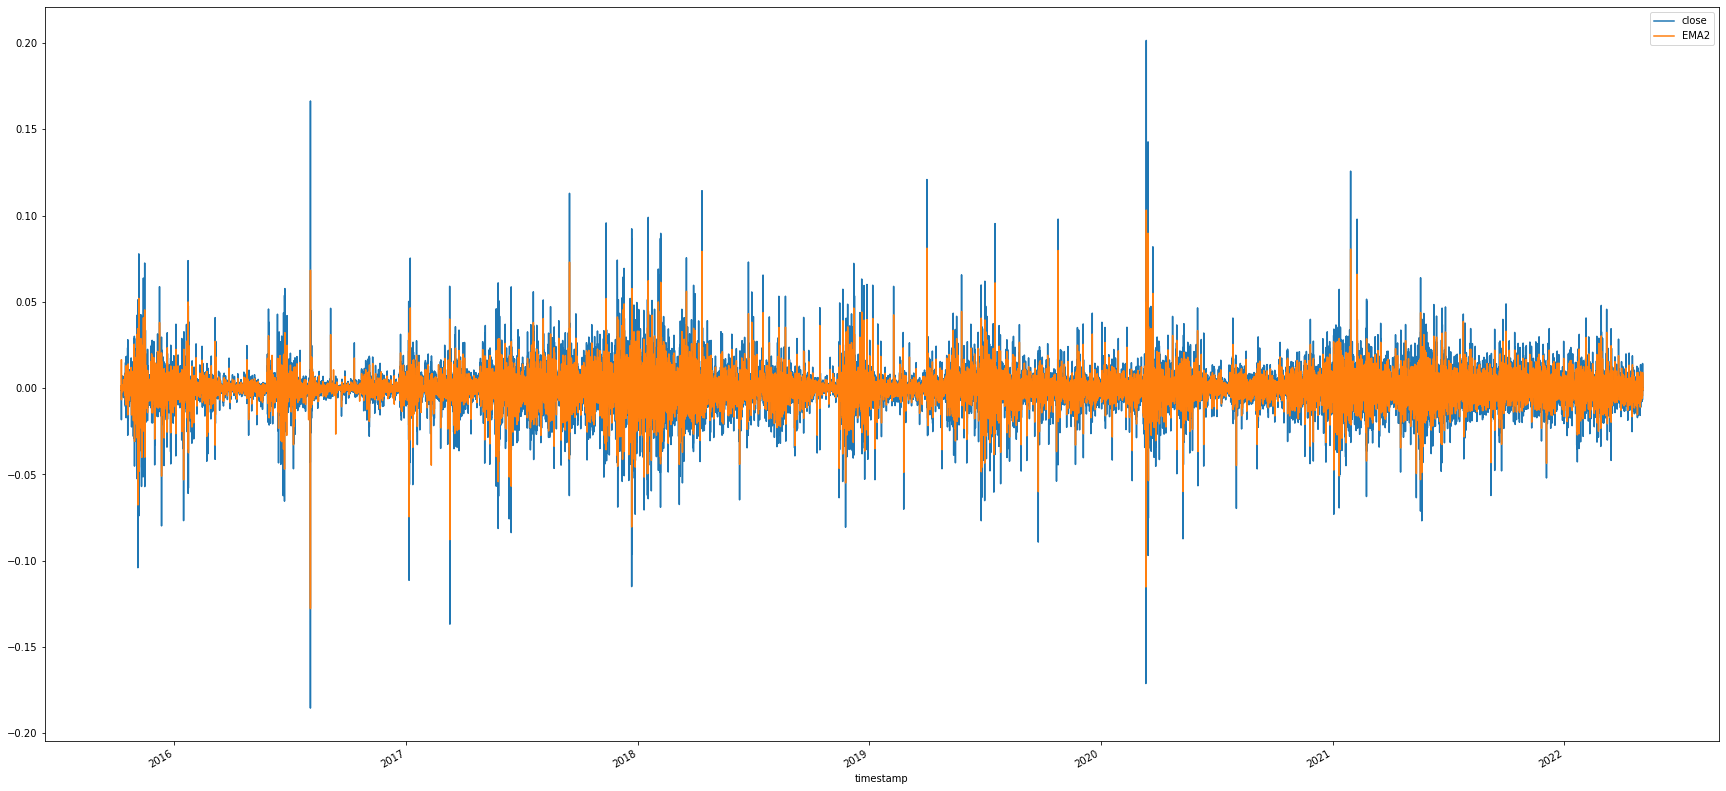

In [ ]:
df[["close", "EMA2"]].plot(figsize=(30, 15))

In [ ]:
df = df[df.index > pd.to_datetime("2020-10-08 22:00:00")]
df

,open,high,low,volume,close,FinalScore,close_pct_prev,EMA2,SMA2,RSI2,prev_close,prev2_close,prev3_close,prev4_close,prev5_close,EMA2_open,EMA2_high,EMA2_low
timestamp,,,,,,,,,,,,,,,,,,
2020-10-08 23:00:00,0.001751,0.003082,0.001065,24.942976,-0.004945,2772.918620,0.002080,0.001734,0.001916,77.146924,0.002080,0.001751,-0.000716,0.000152,0.001345,0.001040,0.002067,0.000873
2020-10-09 00:00:00,0.002080,-0.000445,-0.002295,16.510855,0.002877,-1.000000,-0.004945,-0.002719,-0.001432,11.273000,-0.004945,0.002080,0.001751,-0.000716,0.000152,0.001734,0.000392,-0.001239
2020-10-09 02:00:00,0.002877,0.000850,0.002519,36.639943,-0.001133,-1.166688,-0.000028,0.000319,0.001425,46.692580,-0.000028,0.002877,-0.004945,0.002080,0.001751,0.002496,0.000698,0.001266
2020-10-09 03:00:00,-0.000028,-0.001336,-0.001384,36.918004,-0.001033,4.856753,-0.001133,-0.000649,-0.000580,37.375950,-0.001133,-0.000028,0.002877,-0.004945,0.002080,0.000814,-0.000658,-0.000500
2020-10-09 04:00:00,-0.001133,-0.001082,-0.000515,5.772978,-0.000966,31.869820,-0.001033,-0.000905,-0.001083,39.569997,-0.001033,-0.001133,-0.000028,0.002877,-0.004945,-0.000484,-0.000940,-0.000510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13 19:00:00,0.011907,0.011190,0.012462,27.643384,-0.003539,75.964248,0.011624,0.005046,0.001675,92.281930,0.011624,-0.008274,-0.007261,-0.010514,-0.010856,0.005091,0.004824,0.005436
2022-05-13 20:00:00,-0.003059,-0.003738,-0.003124,32.276690,-0.001300,-0.980444,-0.003539,-0.000677,0.004043,39.623557,-0.003539,0.011624,-0.008274,-0.007261,-0.010514,-0.000342,-0.000884,-0.000270
2022-05-13 21:00:00,-0.001774,-0.001635,-0.001211,19.595915,0.000918,-1.101648,-0.001300,-0.001093,-0.002420,48.329722,-0.001300,-0.003539,0.011624,-0.008274,-0.007261,-0.001296,-0.001385,-0.000897


In [ ]:
exg_features = ["EMA2_open", "EMA2_low", "EMA2", "SMA2", "FinalScore"]

In [ ]:
#df.index = pd.DatetimeIndex(df.index).to_period('D')
df_train, df_test = train_test_split(df, test_size=0.1, shuffle = False)

In [ ]:
model = pm.auto_arima(df_train.close, exogenous=df_train[exg_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.close, exogenous=df_train[exg_features])

Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-73601.195, Time=14.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-80563.928, Time=6.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-80594.643, Time=7.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-80603.463, Time=9.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25014.002, Time=5.80 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80553.354, Time=9.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-80922.709, Time=12.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-82197.312, Time=12.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-82484.284, Time=18.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-81611.040, Time=17.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-82559.653, Time=18.80 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-72841.056, Time=20.25 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-82719.654, Time=24.85 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-82688.565, Time=21.78 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-82820.670, Time=27.25 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=-82843.166, Time=28.08 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-82628.615, Time=23.19 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=-82714.797, Time=33.60 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=-82762.922, Time=30.69 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=-82753.047, Time=27.52 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-82279.174, Time=29.59 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=-82797.705, Time=33.62 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=-82845.384, Time=25.59 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=-82822.779, Time=21.37 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=-82630.639, Time=20.36 sec
 ARIMA(5,1,4)(0,0,0)[0]           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-72843.051, Time=21.86 sec
 ARIMA(3,1,5)(0,0,0)[0]             : AIC=-82755.056, Time=29.30 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-82281.175, Time=25.85 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=-82799.723, Time=31.18 sec

Best model:  ARIMA(4,1,4)(0,0,0)[0]          
Total fit time: 663.869 seconds


ARIMA(order=(4, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
import pickle

In [ ]:
# with open('/content/ARIMAX_2.pkl', 'wb') as files:
#     pickle.dump(model, files)

In [ ]:
with open('/content/ARIMAX_2.pkl' , 'rb') as f:
    model = pickle.load(f)

In [ ]:
forecast = model.predict(n_periods=len(df_test), exogenous = df_test[exg_features])
df_test["Forecast_ARIMAX"] = forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
temp = df_test[df_test.index >= "2022-05-12"]

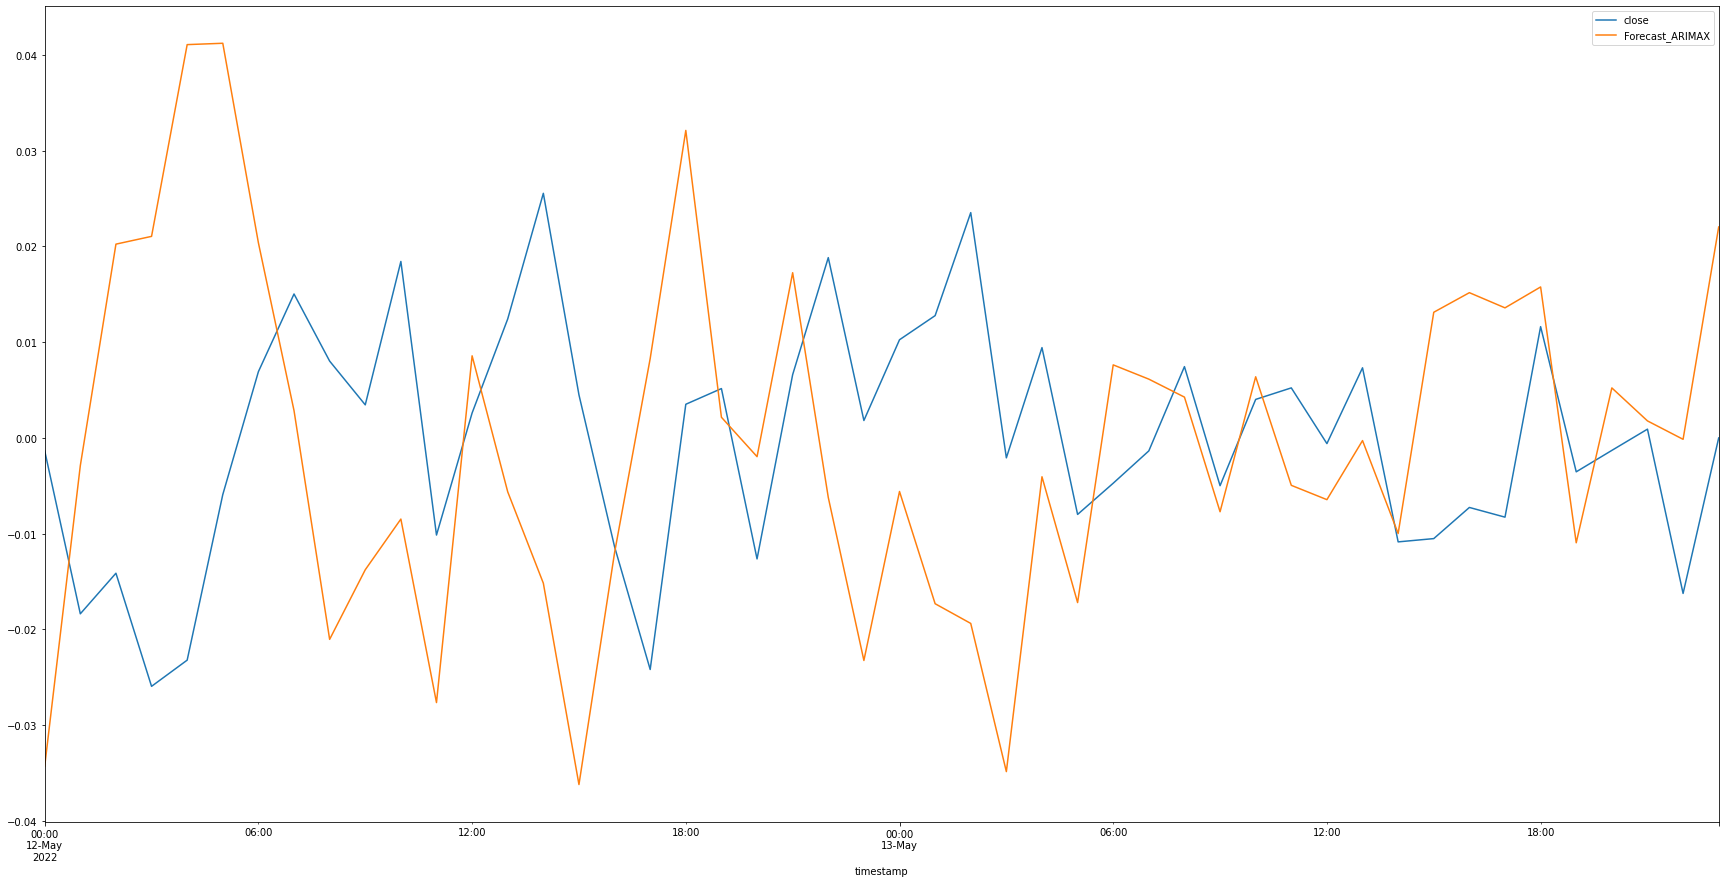

In [ ]:
temp[["close", "Forecast_ARIMAX"]].plot(figsize=(30, 15))

In [ ]:
metrics_df = df_test[["close", "Forecast_ARIMAX"]]
metrics_df

,close,Forecast_ARIMAX
timestamp,,
2022-03-16 18:00:00,0.023067,-0.000531
2022-03-16 19:00:00,0.008764,-0.017820
2022-03-16 20:00:00,-0.002910,-0.020233
2022-03-16 21:00:00,-0.005259,-0.010290
2022-03-16 22:00:00,0.005734,0.000159
...,...,...
2022-05-13 19:00:00,-0.003539,-0.010950
2022-05-13 20:00:00,-0.001300,0.005226
2022-05-13 21:00:00,0.000918,0.001780


In [ ]:
metrics_df.to_csv("/content/Targets.csv")

In [ ]:
metrics_df['Actual_target'] = metrics_df[['close']].apply(lambda x: 1 if x.close > 0 else 0, axis=1)

metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX']].apply(lambda x: 1 if x.Forecast_ARIMAX > 0 else 0, axis=1)

#metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX']].apply(lambda x: 1 if x.Forecast_ARIMAX > -99 else 0, axis=1)

#metrics_df['Pred_target'] = metrics_df[['Forecast_ARIMAX','close']].apply(lambda x: 1 if x.Forecast_ARIMAX > 0 and x.Forecast_ARIMAX <= x.close else 0, axis=1)

In [ ]:
actual_targets = list(metrics_df["Actual_target"])
predicted_targets = list(metrics_df["Pred_target"])



long_ = 0
total_long = 0
short = 0
total_short = 0
long_wrong = 0
short_wrong = 0

for i in range(len(actual_targets)):
    if actual_targets[i] == 1: 
      if actual_targets[i] == predicted_targets[i]:
        long_ += 1
      if predicted_targets[i] == 0:
        short_wrong += 1
      total_long += 1
    else:
      if actual_targets[i] == predicted_targets[i]:
        short += 1
      if predicted_targets[i] == 1:
        long_wrong += 1
      total_short += 1

print(f"total correct long predictions are {long_} out of {total_long} and total correct short predictions are {short} out of {total_short}, so the accuracy is {(long_ + short)/ (total_long + total_short) * 100} %")
print(f"Long wrong are {long_wrong} and short wrong are {short_wrong}")

total correct long predictions are 433 out of 688 and total correct short predictions are 314 out of 703, so the accuracy is 53.702372393961184 %
Long wrong are 389 and short wrong are 255
